A line can be represented as $y = mx+c$, in parametric form the same line can be represented by $\rho = xcos\theta + ysin\theta$ where $\rho$ is the perpendicular distance of the line from the origin and $\theta$ is the angle formed from the horizontal axis and the perpendicular line in counter-clockwise direction 

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('../Resources/Photos/road.jpg')
rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.show()
# gray = cv2.cvtColor(rgb,cv2.COLOR_RGB2GRAY)

# plt.imshow(gray)
# plt.show()

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:

rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(rgb,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,220,255,apertureSize = 3)
plt.imshow(edges)
plt.show()
houghValues = cv2.HoughLines(edges,1,np.pi/180,200)

for line in houghValues:
    rho,theta = line[0]
    #  a=cos(theta), b= sin(theta)
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(rgb,(x1,y1),(x2,y2),(0,0,255),2)

plt.imshow(rgb)
plt.show()
    

probabilistic hough lines : . Probabilistic Hough Transform is an optimization of the Hough Transform we saw. It doesn't take all the points into consideration. Instead, it takes only a random subset of points which is sufficient for line detection. We just have to decrease the threshold.

- minLineLength - Minimum length of line. Line segments shorter than this are rejected.
- maxLineGap - Maximum allowed gap between line segments to treat them as a single line.

In [ ]:
rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(rgb,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,220,255,apertureSize = 3)
plt.imshow(edges)
plt.show()

pHoughLines = cv2.HoughLinesP(edges,1,np.pi/180,50,10,50)
for line in pHoughLines:
    x1,y1,x2,y2 = line[0]
    cv2.line(rgb,(x1,y1),(x2,y2),(0,0,255),2)

plt.imshow(rgb)
plt.show()

**Detection Method**: OpenCV has an advanced implementation, HOUGH_GRADIENT, which uses gradient of the edges instead of filling up the entire 3D accumulator matrix, thereby speeding up the process.<br/>
**dp**: This is the ratio of the resolution of original image to the accumulator matrix.<br/>
**minDist**: This parameter controls the minimum distance between detected circles.<br/>
**Param1**: Canny edge detection requires two parameters — minVal and maxVal. Param1 is the higher threshold of the two. The second one is set as Param1/2.<br/>
**Param2**: This is the accumulator threshold for the candidate detected circles. By increasing this threshold value, we can ensure that only the best circles, corresponding to larger accumulator values, are returned.<br/>
**minRadius**: Minimum circle radius.<br/>
**maxRadius**: Maximum circle radius.<br/>

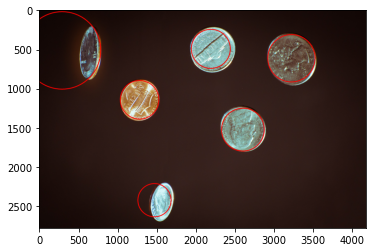

In [33]:
img_coin = cv2.imread('../Resources/Photos/coins.jpg')
# print(img_coin.shape)
# img_coin = cv2.resize(img_coin,)
rgb_coin = cv2.cvtColor(img_coin,cv2.COLOR_BGR2RGB)

gray_coin = cv2.cvtColor(rgb_coin,cv2.COLOR_RGB2GRAY)
canny_coin = cv2.Canny(gray_coin,100,255,apertureSize=3)

houghCircles = cv2.HoughCircles(gray_coin,cv2.HOUGH_GRADIENT,10,1000,param1 = 100,param2 = 50,minRadius = 200,maxRadius=500)
if houghCircles is not None:
    houghCircles = np.uint16(np.around(houghCircles))
    for circle in houghCircles[0,:]:
        cv2.circle(rgb_coin,(circle[0],circle[1]),circle[2],(255,0,0),10)

plt.imshow(rgb_coin)
plt.show()


